In [1]:
import sklearn
import pandas as pd
import numpy as np

# GBDT 实战

In [2]:
user_path = '../dataset/traindata/user_features_data/'
video_path = '../dataset/traindata/video_features_data/'
user_file =  'user_features_data.csv'
video_file =  'video_features_data.csv'

In [3]:
user_df = pd.read_csv(user_path+user_file, sep="\t")
user_df.head()

,user_id,age,gender,country,province,city,city_level,device_name
0,1757005,3,1,0,9,6,3,327
1,17938,0,0,0,4,22,3,327
2,4263520,1,0,0,19,1,5,327
3,1411600,3,0,0,5,138,1,327
4,3992242,2,0,0,0,142,0,327


In [5]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             49731 non-null  int64  
 1   video_name           49722 non-null  object 
 2   video_tags           41831 non-null  object 
 3   video_description    49536 non-null  object 
 4   video_release_date   49061 non-null  object 
 5   video_director_list  38728 non-null  object 
 6   video_actor_list     39543 non-null  object 
 7   video_score          46417 non-null  float64
 8   video_second_class   43821 non-null  object 
 9   video_duration       49731 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.8+ MB


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'video_id'}>,
        <AxesSubplot:title={'center':'video_score'}>],
       [<AxesSubplot:title={'center':'video_duration'}>, <AxesSubplot:>]],
      dtype=object)

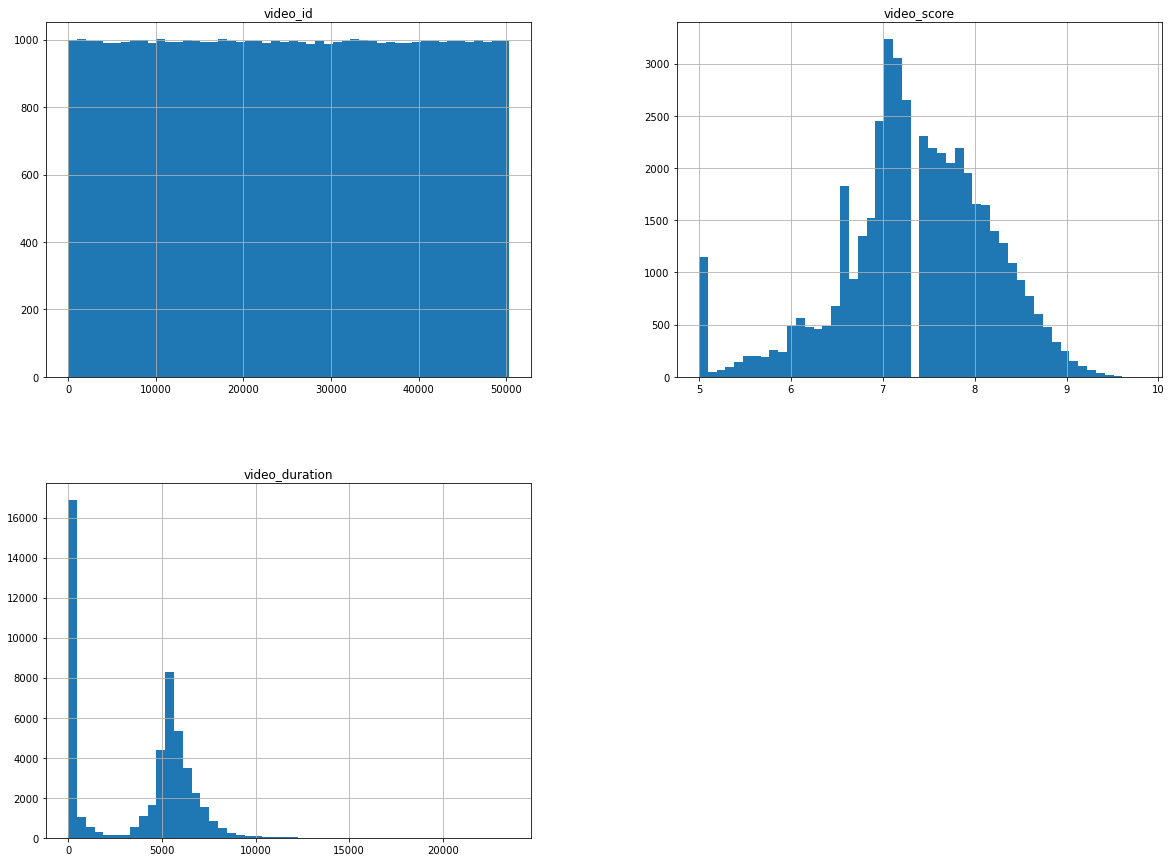

In [7]:
video_df.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'province'}>,
        <AxesSubplot:title={'center':'city'}>],
       [<AxesSubplot:title={'center':'city_level'}>,
        <AxesSubplot:title={'center':'device_name'}>, <AxesSubplot:>]],
      dtype=object)

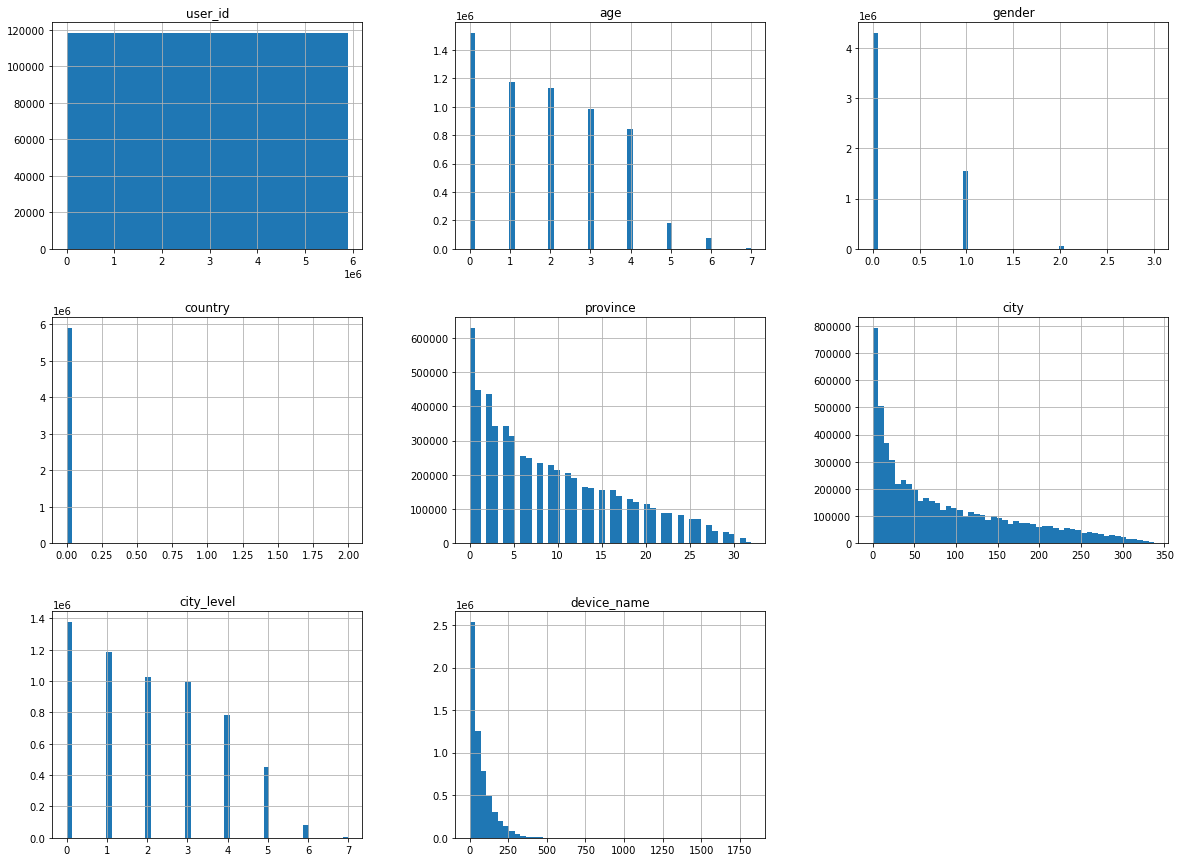

In [8]:
user_df.hist(bins=50, figsize=(20,15))

In [9]:
corr_matrix = user_df.corr()

In [10]:
corr_matrix

,user_id,age,gender,country,province,city,city_level,device_name
user_id,1.000000,0.000240,-0.000149,0.000862,-0.000119,0.000761,-0.000265,-0.000089
age,0.000240,1.000000,0.092405,0.088298,0.083970,0.004194,0.063136,0.036249
gender,-0.000149,0.092405,1.000000,0.154157,0.080784,-0.023991,0.082183,0.014318
country,0.000862,0.088298,0.154157,1.000000,0.078803,0.064332,0.080792,0.049673
province,-0.000119,0.083970,0.080784,0.078803,1.000000,0.271449,0.259382,0.029804
city,0.000761,0.004194,-0.023991,0.064332,0.271449,1.000000,-0.078418,-0.013477
city_level,-0.000265,0.063136,0.082183,0.080792,0.259382,-0.078418,1.000000,0.043073
device_name,-0.000089,0.036249,0.014318,0.049673,0.029804,-0.013477,0.043073,1.000000


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [17]:
video_df.head()

,video_id,video_name,video_tags,video_description,video_release_date,video_director_list,video_actor_list,video_score,video_second_class,video_duration
0,3460,脱皮爸爸,"院线电影,家庭关系,命运","中年失意的儿子田力行（古天乐饰）在生活上遇到了重重危机：母亲病逝,工作不顺,妻子要求离婚。正...",2017-04-27,司徒慧焯,"吴镇宇,古天乐,春夏,蔡洁",7.4,"剧情,喜剧,奇幻",5913
1,14553,喜气洋洋小金莲,"古装喜剧,剧情片,喜剧片,内地电影,欢乐喜剧,爱情纠纷",故事始于西门庆为西门药业的“伟哥”产品寻找代言人，西门庆初见潘金莲，一时惊为天人，为成功抱得...,2015-12-30,"杨珊珊,李亚玲","陈南飞,程隆妮,王闯,贾海涛,闫薇儿",5.6,喜剧,6217
2,1214,风流家族,"男女关系,家庭关系,命运,院线电影",香世仁（钟镇涛 饰）是家财万贯的香港富豪，在满足了一切物质上的要求后，他将生活的重心放在了儿...,2002-03-07,"邱礼涛,杨漪珊","张家辉,卢巧音,钟镇涛,叶童,李蕙敏,张坚庭,袁洁莹,黄佩霞,齐芷瑶,刘以达,叶伟信,邹凯光...",6.8,"都市,喜剧,爱情,家庭",5963
3,30639,大提琴的故事,"短片,动画片",低音大提琴演奏家史密斯科夫正要去参加某贵族的沙龙，途中他被河边的美丽景色所吸引，驻足观看。兴...,1949-01-01,"伊里·特恩卡,契诃夫",NaN,NaN,"动画,爱情",17371
4,38522,歌舞大王齐格飞,"喜剧片,人物传记,浪漫爱情",罗伯特．Z．伦纳德导演的这部影片以百老汇最大的歌舞团——齐格菲歌舞团的创办人佛罗伦斯．齐格菲...,1936-04-08,"罗伯特·Z·伦纳德,William Anthony McGuire","威廉·鲍威尔,玛娜·洛伊,路易丝·赖纳,弗兰克·摩根,范妮·布莱斯,弗吉尼亚·布鲁斯,雷吉纳...",7.7,"剧情,歌舞,喜剧",10608


In [39]:
video_tags = video_df['video_tags'].values.astype('U')
vectorizer.fit_transform(video_tags).todense()
# vectorizer.vocabulary_
video_tags_vector = vectorizer.transform(video_tags)
video_tags_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
video_tags_vector.shape

(49731, 21894)

In [40]:
video_director_list = video_df['video_director_list'].values.astype('U')
vectorizer.fit_transform(video_director_list).todense()
# vectorizer.vocabulary_
video_director_list_vector = vectorizer.transform(video_director_list)
video_director_list_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
video_director_list_vector.shape

(49731, 29278)

In [ ]:
vectorizer.vocabulary_

# 训练数据集构造

---
构造思路：
将三个数据集按照id拼接，第三个数据集只留观看和分享label。

In [3]:
import numpy as np
import pandas as pd
hme_path = "../dataset/traindata/"
user_df = np.load(hme_path+"user_features_data/user_features.npz", allow_pickle=True)
video_df = np.load(hme_path+"video_features_data/video_features.npz", allow_pickle=True)

In [4]:
user_df.files

['features', 'columns']

In [5]:
user_df['features']

KeyboardInterrupt: 

In [6]:
user_df = pd.DataFrame(data=user_df['features'], columns=user_df['columns'])

In [7]:
user_df.describe()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,device_name_0,device_name_1,device_name_2,device_name_3,device_name_4,device_name_5,device_name_6,device_name_7,device_name_8,device_name_9
count,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,...,5.910800e+06,5.910800e+06,5.910800e+06,5.910800e+06,5910800.0,5910800.0,5910800.0,5.910800e+06,5.910800e+06,5.910800e+06
mean,2.955400e+06,2.567483e-01,1.981965e-01,1.919028e-01,1.668549e-01,1.421305e-01,3.070853e-02,1.263281e-02,8.256074e-04,7.261190e-01,...,5.673943e-01,4.313090e-01,-1.934077e-01,-1.455013e-01,0.0,0.0,0.0,-4.422126e-01,1.548904e-01,-1.594297e-01
std,1.706301e+06,4.368394e-01,3.986411e-01,3.937971e-01,3.728463e-01,3.491840e-01,1.725269e-01,1.116836e-01,2.872152e-02,4.459487e-01,...,6.455405e-01,5.986558e-01,4.187924e-01,3.669737e-01,0.0,0.0,0.0,6.100814e-01,3.777625e-01,3.784948e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-3.000000e+00,-3.000000e+00,0.0,0.0,0.0,-4.000000e+00,0.000000e+00,-3.000000e+00
25%,1.477700e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-1.000000e+00,0.000000e+00,0.000000e+00
50%,2.955400e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.433099e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,5.910799e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,3.000000e+00,0.000000e+00


In [8]:
user_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,device_name_0,device_name_1,device_name_2,device_name_3,device_name_4,device_name_5,device_name_6,device_name_7,device_name_8,device_name_9
0,1757005.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4263520.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1411600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3992242.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
video_df = pd.DataFrame(data=video_df['features'], columns=video_df['columns'])

In [80]:
video_df.describe()

,video_id,video_name,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,...,class_5,class_6,class_7,class_8,class_9,da_0,da_1,da_2,da_3,da_4
count,49731,49731,49731.000000,49731,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0,...,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0,49731.0
unique,49731,41845,50.000000,6867,131.0,12.0,31.0,43791.0,43791.0,43791.0,...,3283.0,3283.0,3283.0,3283.0,3283.0,3283.0,3283.0,3283.0,3283.0,3283.0
top,50354,速看CUT,0.736105,0,2016.0,1.0,1.0,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2
freq,1,49,3314.000000,304,2996.0,18660.0,18150.0,1621.0,1621.0,1621.0,...,5935.0,5935.0,5935.0,5935.0,5935.0,5935.0,5935.0,5935.0,5935.0,5935.0


In [12]:
video_df.shape

(49731, 42)

# 构造部分数据集
---
目前只采用1天的交互数据与user, video 拼接，然后训练。

In [13]:
# action_df = pd.read_csv("../dataset/traindata/history_behavior_data/20210502/part-00000-d412c602-2f4a-4649-a81f-e56435dd49fd-c000.csv", sep='\t', usecols=[0,1,3,7])
action_df = pd.read_csv("../dataset/traindata/history_behavior_data/20210502/part-00000-d412c602-2f4a-4649-a81f-e56435dd49fd-c000.csv", sep='\t')

/home/anaconda/envs/digix/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# action_df = action_df['user_id', 'video_id']
action_df.shape

(5529636, 9)

In [15]:
action_df.head()

,user_id,video_id,is_watch,is_share,is_collect,is_comment,watch_start_time,watch_label,pt_d
0,4866878,1759,0,0,0,0,NaN,0,20210502
1,4866878,25144,0,0,0,0,NaN,0,20210502
2,4866878,6693,0,0,0,0,NaN,0,20210502
3,951097,12968,0,0,0,0,NaN,0,20210502
4,951097,3636,0,0,0,0,NaN,0,20210502


In [16]:
# action_df[np.isnan(action_df['watch_start_time'])].index
action_df.dropna(subset=['watch_start_time'], inplace=True)
action_df

,user_id,video_id,is_watch,is_share,is_collect,is_comment,watch_start_time,watch_label,pt_d
123251,4239342,28149,1,0,0,0,2021-05-02,2,20210502
123252,3577036,115,1,0,0,0,2021-05-02,0,20210502
123253,5527504,3636,1,0,0,0,2021-05-02,5,20210502
123254,1117889,12968,1,0,0,0,2021-05-02,0,20210502
123255,1117889,860,1,0,0,0,2021-05-02,4,20210502
...,...,...,...,...,...,...,...,...,...
5529631,3824966,29998,1,0,0,0,2021-05-02,0,20210502
5529632,3824966,26273,1,0,0,0,2021-05-02,0,20210502
5529633,1687377,17585,1,0,0,0,2021-05-02,0,20210502
5529634,1286468,41270,1,0,0,0,2021-05-02,0,20210502


In [17]:
action_df.shape

(465746, 9)

In [93]:
user_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,device_name_0,device_name_1,device_name_2,device_name_3,device_name_4,device_name_5,device_name_6,device_name_7,device_name_8,device_name_9
0,1757005.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4263520.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1411600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3992242.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
video_action_df = video_df.merge(action_df)
video_action_df.head()

,video_id,video_name,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,...,da_3,da_4,user_id,is_watch,is_share,is_collect,is_comment,watch_start_time,watch_label,pt_d
0,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.0762958,0.457277,5415449,1,0,0,0,2021-05-02,0,20210502
1,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.0762958,0.457277,1308118,1,0,0,0,2021-05-02,4,20210502
2,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.0762958,0.457277,4477780,1,0,0,0,2021-05-02,1,20210502
3,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.0762958,0.457277,4163783,1,0,0,0,2021-05-02,8,20210502
4,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.0762958,0.457277,4875316,1,0,0,0,2021-05-02,9,20210502


In [19]:
user_video_action_df = user_df.merge(video_action_df)

In [20]:
user_video_action_df.shape

(462374, 80)

In [ ]:
# user_video_action_df.columns.values.tolist()

In [101]:
pd.set_option('display.max_columns', None)

In [21]:
user_video_action_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,da_2,da_3,da_4,is_watch,is_share,is_collect,is_comment,watch_start_time,watch_label,pt_d
0,944176.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.1,0.1,1,0,0,0,2021-05-02,0,20210502
1,944176.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.553241,0.074159,0.074159,1,0,0,0,2021-05-02,0,20210502
2,944176.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.348555,0.0777567,0.0779852,1,0,0,0,2021-05-02,0,20210502
3,944176.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0782995,0.356287,0.0754026,1,0,0,0,2021-05-02,0,20210502
4,3209562.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0830759,0.404104,0.0830759,1,0,0,0,2021-05-02,0,20210502


In [22]:
del user_video_action_df['video_name']

In [23]:
user_video_action_df.to_csv("../dataset/traindata/history_behavior_data/20210502/502_merged_train.csv", columns=user_video_action_df.columns.values.tolist(), index=None)

# 拼接数据集action数据集

In [14]:
import os
hme_path = "../dataset/traindata/history_behavior_data"
files = os.listdir(hme_path)
file_list = []
for dit in files:
    file = os.listdir(hme_path+'/'+dit)
    file_list.append(hme_path+'/'+dit+'/'+file[0])

In [19]:
file_list

['../dataset/traindata/history_behavior_data/20210427/part-00000-9132ab46-51c3-4cc3-97de-e7ad5312b852-c000.csv',
 '../dataset/traindata/history_behavior_data/20210423/part-00000-9809d73a-a55f-4ac2-a59b-9b83cbc5028e-c000.csv',
 '../dataset/traindata/history_behavior_data/20210420/part-00000-aad75aa4-b60b-4f5b-8def-c4d60f391fae-c000.csv',
 '../dataset/traindata/history_behavior_data/20210430/part-00000-2da4c3a0-2fcc-422d-8b7c-48940da315ad-c000.csv',
 '../dataset/traindata/history_behavior_data/20210419/part-00000-236b99d5-456a-42b2-bd8d-3cbd61d21cc6-c000.csv',
 '../dataset/traindata/history_behavior_data/20210422/part-00000-3d97d0f8-2572-45e6-bb60-f367c97e7870-c000.csv',
 '../dataset/traindata/history_behavior_data/20210425/part-00000-9d23862b-6bbf-48c6-a598-572df1359737-c000.csv',
 '../dataset/traindata/history_behavior_data/20210429/part-00000-c5dbd994-54d7-4734-adea-0f22d75b23d3-c000.csv',
 '../dataset/traindata/history_behavior_data/20210424/part-00000-225e55dc-4504-4c14-b289-3223123

In [28]:
all_action_dataframe = []
all_rows = 0
for path in file_list:
    tmp = pd.read_csv(path, sep='\t')
    all_rows += tmp.shape[0]
#     tmp.dropna(subset=['watch_start_time'], inplace=True)
#     tmp = tmp.loc[:, ['user_id','video_id','is_share','watch_label']]
#     all_action_dataframe.append(tmp)

# action_data = pd.concat(all_action_dataframe,ignore_index = False)
del all_action_dataframe
# action_data.head()
all_rows

/home/anaconda/envs/digix/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


80276856

In [23]:
action_data.columns.values.tolist()

['user_id', 'video_id', 'is_share', 'watch_label']

In [24]:
action_data.to_csv("../dataset/traindata/history_behavior_data/all_action_data.csv", columns=action_data.columns.values.tolist(), index=None)

In [25]:
del action_data

In [27]:
all_action_data = pd.read_csv("../dataset/traindata/history_behavior_data/all_action_data.csv")

,user_id,video_id,is_share,watch_label
0,4330891,16901,0,0
1,4330891,16813,0,0
2,2828470,11926,0,0
3,3594099,38350,0,0
4,4971201,44786,0,0
...,...,...,...,...
7353019,1578540,6693,0,0
7353020,3241301,3468,0,0
7353021,2193774,28149,0,0
7353022,2193774,7191,0,9


---
所有数据共80276856行，其中有观看日期的数据共7353024行

# 构造user-video-action 训练表

In [2]:
all_action_data = pd.read_csv("../dataset/traindata/history_behavior_data/all_action_data.csv")
all_action_data.head()

,user_id,video_id,is_share,watch_label
0,4330891,16901,0,0
1,4330891,16813,0,0
2,2828470,11926,0,0
3,3594099,38350,0,0
4,4971201,44786,0,0


In [3]:
hme_path = "../dataset/traindata/"
user_npz = np.load(hme_path+"user_features_data/user_features.npz", allow_pickle=True)
user_df = pd.DataFrame(data=user_npz['features'], columns=user_npz['columns'])
user_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,device_name_0,device_name_1,device_name_2,device_name_3,device_name_4,device_name_5,device_name_6,device_name_7,device_name_8,device_name_9
0,1757005.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4263520.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1411600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3992242.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
video_npz = np.load(hme_path+"video_features_data/video_features.npz", allow_pickle=True)
video_df = pd.DataFrame(data=video_npz['features'], columns=video_npz['columns'])
video_df.head()

,video_id,video_name,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,...,class_5,class_6,class_7,class_8,class_9,da_0,da_1,da_2,da_3,da_4
0,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.31752,0.378994,0.0379362,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277
1,14553,喜气洋洋小金莲,0.56,6217,2015,12,30,0.421008,0.417355,0.0202171,...,0.54999,0.05,0.0500042,0.05,0.05,0.101247,0.101469,0.595888,0.1,0.101396
2,1214,风流家族,0.68,5963,2002,3,7,0.026798,0.758817,0.026797,...,0.0351014,0.0350833,0.68421,0.0350833,0.0350833,0.0703175,0.26573,0.523365,0.0701666,0.0704209
3,30639,大提琴的故事,0.736105,17371,1949,1,1,0.222536,0.023067,0.0230584,...,0.0418249,0.0418127,0.0418164,0.0418127,0.38539,0.0836254,0.085808,0.0955543,0.0836254,0.651387
4,38522,歌舞大王齐格飞,0.77,10608,1936,4,8,0.0760661,0.0196374,0.62808,...,0.0393965,0.0393676,0.039373,0.03937,0.0393686,0.0797264,0.678711,0.0830405,0.0791744,0.0793477


In [5]:
video_df.drop(['video_name'], axis=1, inplace=True)

In [6]:
video_df.head()

,video_id,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,desc_3,...,class_5,class_6,class_7,class_8,class_9,da_0,da_1,da_2,da_3,da_4
0,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.31752,0.378994,0.0379362,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277
1,14553,0.56,6217,2015,12,30,0.421008,0.417355,0.0202171,0.0202038,...,0.54999,0.05,0.0500042,0.05,0.05,0.101247,0.101469,0.595888,0.1,0.101396
2,1214,0.68,5963,2002,3,7,0.026798,0.758817,0.026797,0.0267946,...,0.0351014,0.0350833,0.68421,0.0350833,0.0350833,0.0703175,0.26573,0.523365,0.0701666,0.0704209
3,30639,0.736105,17371,1949,1,1,0.222536,0.023067,0.0230584,0.0230638,...,0.0418249,0.0418127,0.0418164,0.0418127,0.38539,0.0836254,0.085808,0.0955543,0.0836254,0.651387
4,38522,0.77,10608,1936,4,8,0.0760661,0.0196374,0.62808,0.0196315,...,0.0393965,0.0393676,0.039373,0.03937,0.0393686,0.0797264,0.678711,0.0830405,0.0791744,0.0793477


In [8]:
video_action_df = video_df.merge(all_action_data)
video_action_df.head()

,video_id,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,desc_3,...,class_8,class_9,da_0,da_1,da_2,da_3,da_4,user_id,is_share,watch_label
0,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277,1821387,0,1
1,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277,1062026,0,3
2,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277,5099204,0,0
3,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277,3628114,0,0
4,3460,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,0.0253976,...,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277,5178806,0,4


In [9]:
user_video_action_df = user_df.merge(video_action_df)
user_video_action_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,class_7,class_8,class_9,da_0,da_1,da_2,da_3,da_4,is_share,watch_label
0,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0417793,0.0417799,0.0417721,0.324848,0.0835443,0.0835443,0.0835443,0.424519,0,0
1,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.05,0.05,0.05,0.1,0.1,0.6,0.1,0.1,0,0
2,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0354791,0.0354816,0.0354805,0.432491,0.075271,0.0731865,0.0714866,0.347565,0,3
3,4263520.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0376006,0.0376006,0.0376006,0.0752015,0.0752018,0.699193,0.0752015,0.0752018,0,9
4,5181723.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0342657,0.0342613,0.0342605,0.50428,0.0722585,0.0705514,0.0690065,0.283903,0,0


In [10]:
user_video_action_df.shape

(7308018, 74)

In [11]:
user_video_action_df.to_csv("../dataset/traindata/user_video_14day_action_train_data.csv", columns=user_video_action_df.columns.values.tolist(), index=None)

# 构造测试数据集user-video

In [9]:
test_df = pd.read_csv('../dataset/testdata/test.csv', sep=',')

In [10]:
test_df

,user_id,video_id
0,1688013,32645
1,4502598,41270
2,5585629,16345
3,1635520,28149
4,4160191,40554
...,...,...
2822175,5019057,18766
2822176,5019057,12968
2822177,4255762,21794
2822178,171497,21578


In [11]:
hme_path = "../dataset/traindata/"
user_npz = np.load(hme_path+"user_features_data/user_features.npz", allow_pickle=True)
user_df = pd.DataFrame(data=user_npz['features'], columns=user_npz['columns'])
user_df.head()

,user_id,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,gender_0,...,device_name_0,device_name_1,device_name_2,device_name_3,device_name_4,device_name_5,device_name_6,device_name_7,device_name_8,device_name_9
0,1757005.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17938.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4263520.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1411600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3992242.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
video_npz = np.load(hme_path+"video_features_data/video_features.npz", allow_pickle=True)
video_df = pd.DataFrame(data=video_npz['features'], columns=video_npz['columns'])
video_df.head()

,video_id,video_name,video_score,video_duration,video_release_year,video_release_month,video_release_day,desc_0,desc_1,desc_2,...,class_5,class_6,class_7,class_8,class_9,da_0,da_1,da_2,da_3,da_4
0,3460,脱皮爸爸,0.74,5913,2017,4,27,0.0254032,0.771378,0.0253972,...,0.31752,0.378994,0.0379362,0.0379328,0.0379309,0.0767949,0.0768916,0.312741,0.0762958,0.457277
1,14553,喜气洋洋小金莲,0.56,6217,2015,12,30,0.421008,0.417355,0.0202171,...,0.54999,0.05,0.0500042,0.05,0.05,0.101247,0.101469,0.595888,0.1,0.101396
2,1214,风流家族,0.68,5963,2002,3,7,0.026798,0.758817,0.026797,...,0.0351014,0.0350833,0.68421,0.0350833,0.0350833,0.0703175,0.26573,0.523365,0.0701666,0.0704209
3,30639,大提琴的故事,0.736105,17371,1949,1,1,0.222536,0.023067,0.0230584,...,0.0418249,0.0418127,0.0418164,0.0418127,0.38539,0.0836254,0.085808,0.0955543,0.0836254,0.651387
4,38522,歌舞大王齐格飞,0.77,10608,1936,4,8,0.0760661,0.0196374,0.62808,...,0.0393965,0.0393676,0.039373,0.03937,0.0393686,0.0797264,0.678711,0.0830405,0.0791744,0.0793477


In [13]:
video_df.drop(['video_name'], axis=1, inplace=True)

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822180 entries, 0 to 2822179
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   video_id  int64
dtypes: int64(2)
memory usage: 43.1 MB


In [26]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   video_id             49731 non-null  object
 1   video_score          49731 non-null  object
 2   video_duration       49731 non-null  object
 3   video_release_year   49731 non-null  object
 4   video_release_month  49731 non-null  object
 5   video_release_day    49731 non-null  object
 6   desc_0               49731 non-null  object
 7   desc_1               49731 non-null  object
 8   desc_2               49731 non-null  object
 9   desc_3               49731 non-null  object
 10  desc_4               49731 non-null  object
 11  desc_5               49731 non-null  object
 12  desc_6               49731 non-null  object
 13  desc_7               49731 non-null  object
 14  desc_8               49731 non-null  object
 15  desc_9               49731 non-null  object
 16  tags

In [38]:
video_df = video_df.astype('float')
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             49731 non-null  float64
 1   video_score          49731 non-null  float64
 2   video_duration       49731 non-null  float64
 3   video_release_year   49731 non-null  float64
 4   video_release_month  49731 non-null  float64
 5   video_release_day    49731 non-null  float64
 6   desc_0               49731 non-null  float64
 7   desc_1               49731 non-null  float64
 8   desc_2               49731 non-null  float64
 9   desc_3               49731 non-null  float64
 10  desc_4               49731 non-null  float64
 11  desc_5               49731 non-null  float64
 12  desc_6               49731 non-null  float64
 13  desc_7               49731 non-null  float64
 14  desc_8               49731 non-null  float64
 15  desc_9               49731 non-null 

In [57]:
user_test_df = pd.merge(user_df, test_df, how='right', on=['user_id'])

In [58]:
user_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822180 entries, 0 to 2822179
Data columns (total 32 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        float64
 1   age_0          float64
 2   age_1          float64
 3   age_2          float64
 4   age_3          float64
 5   age_4          float64
 6   age_5          float64
 7   age_6          float64
 8   age_7          float64
 9   gender_0       float64
 10  gender_1       float64
 11  gender_2       float64
 12  gender_3       float64
 13  city_level_0   float64
 14  city_level_1   float64
 15  city_level_2   float64
 16  city_level_3   float64
 17  city_level_4   float64
 18  city_level_5   float64
 19  city_level_6   float64
 20  city_level_7   float64
 21  device_name_0  float64
 22  device_name_1  float64
 23  device_name_2  float64
 24  device_name_3  float64
 25  device_name_4  float64
 26  device_name_5  float64
 27  device_name_6  float64
 28  device_name_7  float64
 29  device_name_8 

In [59]:
user_video_test_df = pd.merge(user_test_df, video_df,  how='left', on=['video_id'] )

In [60]:
user_video_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822180 entries, 0 to 2822179
Data columns (total 72 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              float64
 1   age_0                float64
 2   age_1                float64
 3   age_2                float64
 4   age_3                float64
 5   age_4                float64
 6   age_5                float64
 7   age_6                float64
 8   age_7                float64
 9   gender_0             float64
 10  gender_1             float64
 11  gender_2             float64
 12  gender_3             float64
 13  city_level_0         float64
 14  city_level_1         float64
 15  city_level_2         float64
 16  city_level_3         float64
 17  city_level_4         float64
 18  city_level_5         float64
 19  city_level_6         float64
 20  city_level_7         float64
 21  device_name_0        float64
 22  device_name_1        float64
 23  device_name_2        float64
 24

In [62]:
user_video_test_df.to_csv("../dataset/testdata/user_video_test.csv", columns=user_video_test_df.columns.values.tolist(), index=None)

In [63]:
user_video_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822180 entries, 0 to 2822179
Data columns (total 72 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              float64
 1   age_0                float64
 2   age_1                float64
 3   age_2                float64
 4   age_3                float64
 5   age_4                float64
 6   age_5                float64
 7   age_6                float64
 8   age_7                float64
 9   gender_0             float64
 10  gender_1             float64
 11  gender_2             float64
 12  gender_3             float64
 13  city_level_0         float64
 14  city_level_1         float64
 15  city_level_2         float64
 16  city_level_3         float64
 17  city_level_4         float64
 18  city_level_5         float64
 19  city_level_6         float64
 20  city_level_7         float64
 21  device_name_0        float64
 22  device_name_1        float64
 23  device_name_2        float64
 24

# 查看数据

In [8]:
tt = pd.read_csv("../dataset/traindata/user_video_14day_action_train_data.csv", nrows=10)

In [10]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              10 non-null     float64
 1   age_0                10 non-null     float64
 2   age_1                10 non-null     float64
 3   age_2                10 non-null     float64
 4   age_3                10 non-null     float64
 5   age_4                10 non-null     float64
 6   age_5                10 non-null     float64
 7   age_6                10 non-null     float64
 8   age_7                10 non-null     float64
 9   gender_0             10 non-null     float64
 10  gender_1             10 non-null     float64
 11  gender_2             10 non-null     float64
 12  gender_3             10 non-null     float64
 13  city_level_0         10 non-null     float64
 14  city_level_1         10 non-null     float64
 15  city_level_2         10 non-null     float6

# submission 构造

In [2]:
test_df = pd.read_csv('../dataset/testdata/test.csv', sep=',')

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822180 entries, 0 to 2822179
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   video_id  int64
dtypes: int64(2)
memory usage: 43.1 MB


In [3]:
watch_label_df = pd.read_csv('../dataset/testdata/watch_label_result.csv')

In [9]:
watch_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822180 entries, 0 to 2822179
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       int64
dtypes: int64(1)
memory usage: 21.5 MB


In [4]:
share_label_df = pd.read_csv('../dataset/testdata/share_label_result.csv')

In [11]:
share_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822180 entries, 0 to 2822179
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       int64
dtypes: int64(1)
memory usage: 21.5 MB


In [12]:
submission_df = pd.concat([test_df, watch_label_df, share_label_df], axis=1)

In [14]:
submission_df.columns = ['user_id','video_id','watch_label','is_share']

In [16]:
submission_df.to_csv("submission.csv", sep=',', encoding='utf-8', index=None)